<a href="https://colab.research.google.com/github/SheikhJones/Data-Analysis-Project-/blob/Amazon-Sales-Data-Analytics/Amazon_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/Amazon Sales data.csv"
df = pd.read_csv(file_path)


In [2]:
# Data Quality Assessment
print("Data Quality Assessment:")
print(df.info())  # Summary of the dataset including data types and missing values
print("\n")


Data Quality Assessment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None




In [3]:
# Data Cleaning
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with missing values in 'Order Date' column
df.dropna(subset=['Order Date'], inplace=True)

# Extract Year, Month, and Year-Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')


In [4]:
# Display all data
print(df)

                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Prio

In [5]:
# Sales Trend Analysis
# Month-wise Sales
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

# Year-wise Sales
yearly_sales = df.groupby('Year')['Total Revenue'].sum()

# Year-Month-wise Sales
year_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum()


In [6]:
print(monthly_sales)

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


In [7]:
print(yearly_sales)

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


In [9]:
print(year_monthly_sales)

Year-Month
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07    4445093.92
2012-08     576782.80
2012-09    4648152.72
2012-10    3042246.77
2013-02    3296425.02
2013-03     835759.10
2013-04    3262562.10
2013-06    1352867.40
2013-07    8545511.20
2013-08      89623.98
2013-09      71253.21
2013-10    2702770.40
2013-12     173676.25
2014-02    1819660.25
2014-04    4510578.10
2014-05    3060338.59
2014-06      75591.66
2014-07     688641.85
2014-08     455479.04
2014-09      20404.71
2014-10    1352370.65
2014-11    4647149.58
2015-01    5513227.50
2015-02    2003911.12
2015-04    1059987.26

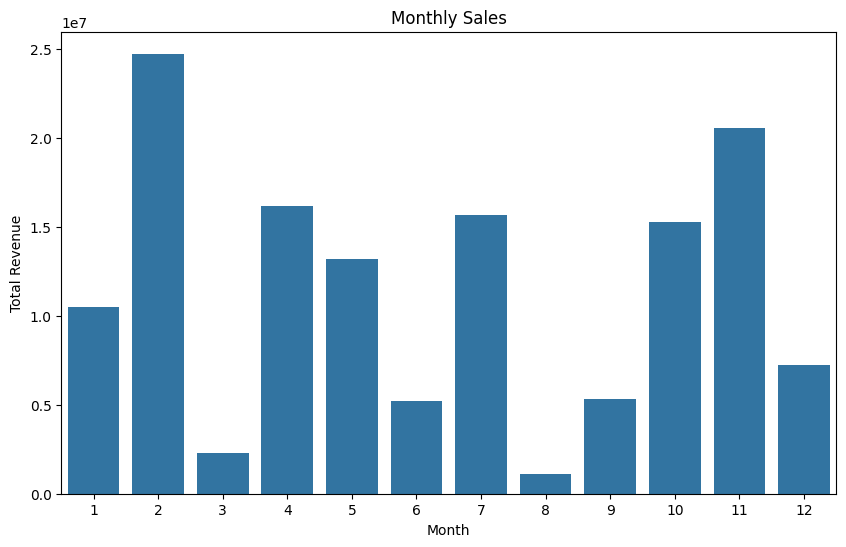

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Monthly Sales Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


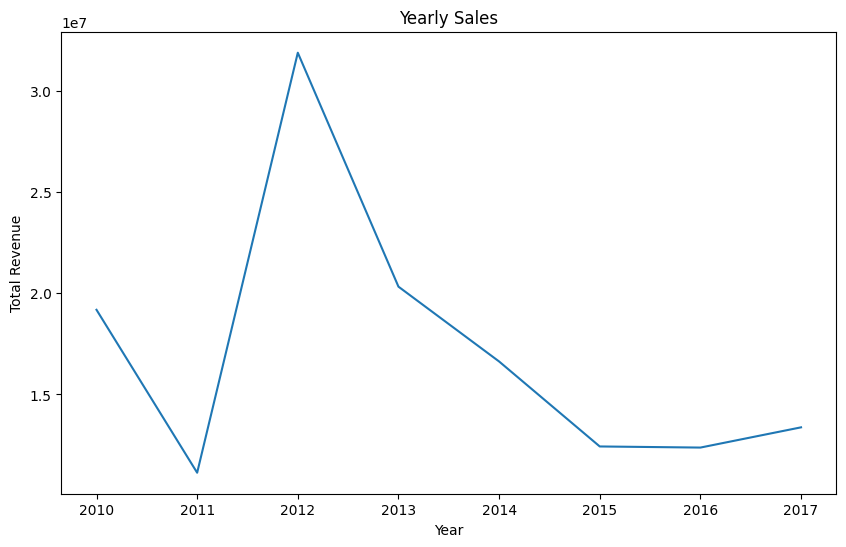

In [11]:
# Yearly Sales Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()




In [12]:
# Year-Month Sales Visualization
fig = px.line(x=year_monthly_sales.index.astype(str), y=year_monthly_sales.values,
              labels={'x': 'Year-Month', 'y': 'Total Revenue'}, title='Year-Month Sales')
fig.show()

In [16]:
import plotly.graph_objects as go

# Dashboard Construction
# We can create an interactive dashboard using Plotly
# For simplicity, let's construct a basic dashboard with the three visualizations

# Create trace for Monthly Sales
trace_monthly_sales = go.Bar(x=monthly_sales.index, y=monthly_sales.values, name="Monthly Sales")

# Create trace for Yearly Sales
trace_yearly_sales = go.Scatter(x=yearly_sales.index, y=yearly_sales.values, mode="lines", name="Yearly Sales")

# Create trace for Year-Month Sales
trace_year_monthly_sales = go.Scatter(x=year_monthly_sales.index.astype(str), y=year_monthly_sales.values, mode="lines", name="Year-Month Sales")

# Dashboard layout
dashboard_layout = go.Layout(
    title="Amazon Sales Dashboard",
    xaxis=dict(title="Time"),
    yaxis=dict(title="Total Revenue")
)

# Construct the dashboard
fig = go.Figure(data=[trace_monthly_sales, trace_yearly_sales, trace_year_monthly_sales], layout=dashboard_layout)

# Display the dashboard
fig.show()
